In [263]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt # import matplotlib.pyplot as plt

In [264]:
# read in data
data_path = '.\\data\\banknote-authentication.csv'
data = pd.read_csv(data_path)

In [265]:
data.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [266]:
data.describe()

,3.6216,8.6661,-2.8073,-0.44699,0
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [267]:
data = np.array(data)
X = data[:, 0:4].T
y = data[:, 4:5].T
m = data.shape[0]
print(X.shape)
print(y.shape)
print(X[0:3])
print(y[0:3])

(4, 1371)
(1, 1371)
[[  4.5459    3.866     3.4566  ...  -3.7503   -3.5637   -2.5419 ]
 [  8.1674   -2.6383    9.5228  ... -13.4586   -8.3827   -0.65804]
 [ -2.4586    1.9242   -4.0112  ...  17.5932   12.393     2.6842 ]]
[[0. 0. 0. ... 1. 1. 1.]]


In [268]:
# initialize
w = np.zeros((X.shape[0], 1))
b = 0
learning_rate = 0.8
loss = []
wrong = [] # num of misclassified
w.shape

(4, 1)

In [269]:
def cross_entropy(a, y):
    return (y * np.log(a) + (1 - y) * np.log(1 - a))

In [270]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [271]:
a = sigmoid(w.T @ X + b)
cross_entropy(a, y)

array([[-0.69314718, -0.69314718, -0.69314718, ..., -0.69314718,
        -0.69314718, -0.69314718]])

In [272]:
a.shape

(1, 1371)

In [273]:
np.int32(a >= 0.5)

array([[1, 1, 1, ..., 1, 1, 1]])

In [274]:
# train
for i in range(1000):
    # predict
    z = w.T @ X + b
    a = sigmoid(z)
    
    # gradient descent
    w -= learning_rate / m * X @ (a - y).T
    b -= learning_rate / m * np.sum(a - y)
    
    if i % 100 == 0:
        wrong.append(np.sum(np.abs(np.int32(a >= 0.5) - y)))
        print('#misclassified after %d epochs = %d' % (i, wrong[-1]))
        loss.append(-np.sum(cross_entropy(a, y)) / m)
        print('#loss after %d epochs = %d' % (i, loss[-1]))
        

#misclassified after 0 epochs = 761
#loss after 0 epochs = 0
#misclassified after 100 epochs = 16
#loss after 100 epochs = 0
#misclassified after 200 epochs = 14
#loss after 200 epochs = 0
#misclassified after 300 epochs = 13
#loss after 300 epochs = 0
#misclassified after 400 epochs = 13
#loss after 400 epochs = 0
#misclassified after 500 epochs = 13
#loss after 500 epochs = 0
#misclassified after 600 epochs = 13
#loss after 600 epochs = 0
#misclassified after 700 epochs = 14
#loss after 700 epochs = 0
#misclassified after 800 epochs = 14
#loss after 800 epochs = 0
#misclassified after 900 epochs = 14
#loss after 900 epochs = 0


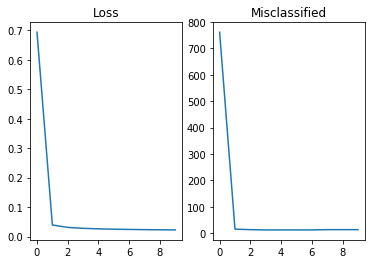

In [275]:
# plot
plt.subplot(121)
plt.plot(loss)
plt.title('Loss')
plt.subplot(122)
plt.plot(wrong)
plt.title('Misclassified')
plt.show()

In [276]:
# evaluate
select = np.random.randint(0, m)
z = w.T @ X[:, select] + b
a = sigmoid(z)
print('Data #%d , predicted class is %d, target class is %d' % (select, np.int32(a >= 0.5), y[0, select]))

Data #222 , predicted class is 0, target class is 0
